# Fake news detection/classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import neattext as nt
import spacy
from sklearn.model_selection import train_test_split

## Loading Data

In [5]:
# datasets
fake_data = pd.read_csv('datasets/Fake.csv')
true_data = pd.read_csv('datasets/True.csv')

# adding class column (fake - 1, real - 0)
fake_data['class'] = 1
true_data['class'] = 0

In [4]:
# joining both fake/real datasets and shuffling 
data = pd.concat([fake_data, true_data])
data = data.sample(frac=1).reset_index(drop=True)
data.drop('date', axis=1, inplace=True) # dropping date feature as it is not required for analysis
data

,title,text,subject,class
0,"Trump, Biden attend same Pennsylvania college ...",(Reuters) - Presidential politics crept into t...,politicsNews,0
1,HILARIOUS! Random French People Say They’d Gla...,Watch this hilarious video from our British co...,left-news,1
2,Bill Maher Shows America Why Donald Trump Mus...,Bill Maher is not shy about what he thinks of ...,News,1
3,THE LIST of 34 House Republicans DEMANDING Per...,Who wants to deport Dreamers ? Not many peopl...,politics,1
4,"Undeterred By Threats Of GOP Obstruction, Oba...",President Obama is clearly not letting GOP thr...,News,1
...,...,...,...,...
44893,"AFTER MONTHS OF TRASHING OUR PRESIDENT, Senato...","Conservative talk radio, tv and websites are n...",left-news,1
44894,China unveils new leadership line-up with no c...,BEIJING (Reuters) - China s ruling Communist P...,worldnews,0
44895,"Caitlyn Jenner Slams Trump, Considers Running...",Caitlyn Jenner is not afraid to speak her mind...,News,1
44896,Antonin Scalia’s Own Past Ruling Will Hand Ob...,The Obama administration recently sent a missi...,News,1


------------------------------------------
## Visualization:

<AxesSubplot:xlabel='class', ylabel='count'>

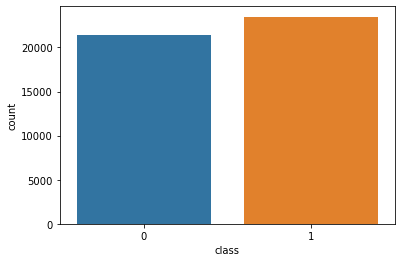

In [4]:
sns.countplot(x='class', data=data)

The number of fake & real news in the dataset are not too far off. <br>
The dataset is balanced.

<AxesSubplot:xlabel='subject', ylabel='count'>

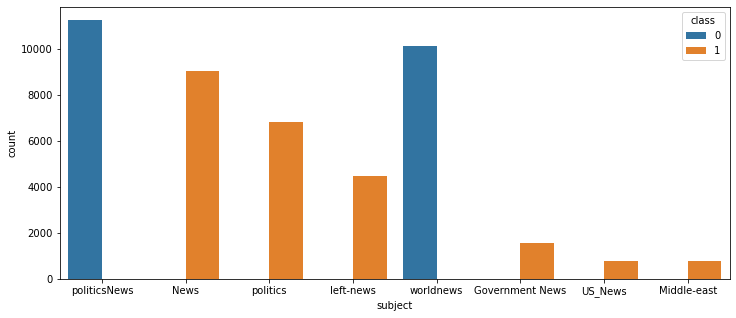

In [5]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='subject', hue='class')

The subjects are not common for the fake and real news. <br>
This feature is not useful for analysis/training.

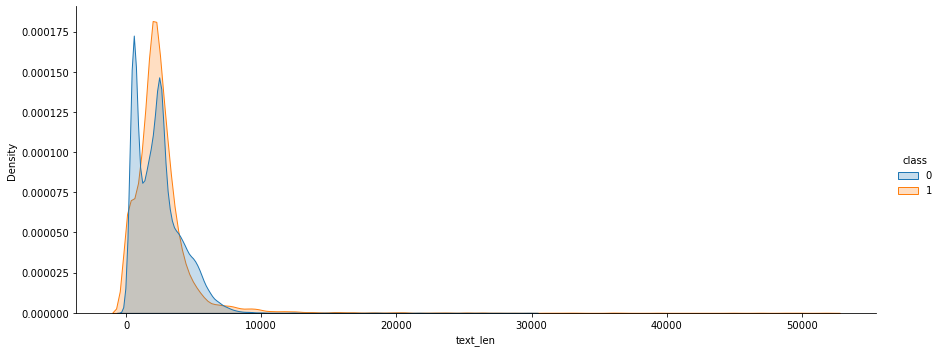

In [6]:
data['text_len'] = data['text'].apply(lambda x: len(x))
sns.displot(data, x=data['text_len'], hue='class', kind='kde', fill=True, height=5, aspect=2.5)

There is no observable pattern between length of a news article and its authenticity.

In [7]:
# adding feature to count all-caps words in title
data['all_caps'] = data['title'].apply(lambda x: sum(map(str.isupper, x.split())))
data

,title,text,subject,class,text_len,all_caps
0,Timeline: Zika's origin and global spread,The following timeline charts the origin and s...,politicsNews,0,8664,0
1,Factbox: The race to the U.S. presidential nom...,(Reuters) - The nominating contests that will ...,politicsNews,0,5830,1
2,Senior national security official to leave Jus...,WASHINGTON (Reuters) - A senior U.S. Justice D...,politicsNews,0,3152,0
3,U.N. Report: Police Killings Of Black Men In ...,The epidemic of black men being killed at the ...,News,1,3276,2
4,Neil DeGrasse Tyson SCHOOLS Rapper B.O.B Over...,If you were not aware there is a seriously old...,News,1,3507,3
...,...,...,...,...,...,...
44893,NATIONAL SECURITY ALERT! Obama Administration ...,OUR GOVERNMENT IS GIVING OUT GREEN CARDS LIKE ...,politics,1,3232,3
44894,White House declines comment on Johnson Contro...,WASHINGTON (Reuters) - The White House on Wedn...,politicsNews,0,573,0
44895,HILLARY CONFIDANTE Asked If She’ll Run in 2020...,Stuart Varney asked Hillary friend and adviser...,politics,1,1319,2
44896,COVER UP: Sean Spicer Asked CIA And Top Repub...,There needs to be an independent commission an...,News,1,2961,3


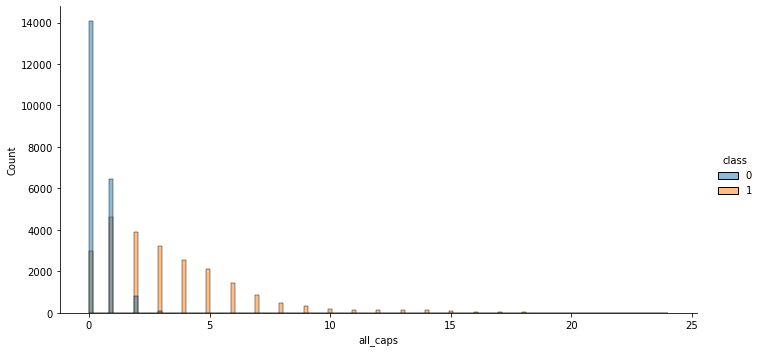

In [8]:
sns.displot(data=data, x=data['all_caps'], hue='class', height=5, aspect=2)

**It is noticed that the greater the number of all-caps words present in the title, the more likely that the article is fake.**

-----------------------------------------------
## Cleaning text:

Trying out neattext

In [10]:
# cleaning text to remove dates,urls,tags,puncts etc
def clean_text(text):
    
    text = text.lower()
    doc = nt.TextFrame(text)
    # processes are clear
    doc.remove_dates()
    doc.remove_urls()
    doc.remove_emails()
    doc.remove_numbers()
    doc.remove_special_characters()
    doc.remove_puncts()
    doc.remove_stopwords()
    
    return doc.text


data['title'] = data['title'].apply(lambda x: clean_text(x))
data['text'] = data['text'].apply(lambda x: clean_text(x))
data

,title,text,subject,class,text_len,all_caps
0,secretary state trip asia,washington reuters secretary state rex tillers...,politicsNews,0,1647,1
1,obama commit felony sent million iran video,fox news senior judicial analyst judge andrew ...,Government News,1,138,5
2,cranky socialist bernie sanders temper tantrum...,grouch bernie sanders bad day maybe realized s...,politics,1,110,8
3,clinton leads trump percent white house race w...,washington reuters democratic presidential nom...,politicsNews,0,573,0
4,chinas highestprofile fugitive assailed busine...,beijing reuters china highest profile fugitive...,worldnews,0,3801,0
...,...,...,...,...,...,...
44893,watch elizabeth warren destroy donald trump ep...,senator elizabeth warren dma lit republican pr...,News,1,3275,2
44894,trump mocked inventing fake civil war battle g...,frederick douglass andrew jackson disappointed...,News,1,4472,2
44895,internet living great firewall china,reuters great firewall china world extensive e...,worldnews,0,2456,1
44896,exclusive pursues direct diplomacy north korea...,washington reuters united states quietly pursu...,worldnews,0,5397,1


-----------------------------------------------------------
## Lemmatizing text

In [11]:
# replacing words with their lemma 
def lemmatize(text):
    
    doc = nlp(text)
    text_lemma = ' '.join(token.lemma_ for token in doc)
    text_lemma.replace('-PRON-','')
    
    return text_lemma


nlp = spacy.load('en_core_web_sm')
data['title'] = data['title'].apply(lambda x: lemmatize(x))
data['text'] = data['text'].apply(lambda x: lemmatize(x))
data

,title,text,subject,class,text_len,all_caps
0,secretary state trip asia,washington reuter secretary state rex tillerso...,politicsNews,0,1647,1
1,obama commit felony send million iran video,fox news senior judicial analyst judge andrew ...,Government News,1,138,5
2,cranky socialist bernie sander temper tantrum ...,grouch bernie sander bad day maybe realize she...,politics,1,110,8
3,clinton lead trump percent white house race wa...,washington reuter democratic presidential nomi...,politicsNews,0,573,0
4,china highestprofile fugitive assail businessm...,beijing reuter china high profile fugitive exi...,worldnews,0,3801,0
...,...,...,...,...,...,...
44893,watch elizabeth warren destroy donald trump ep...,senator elizabeth warren dma light republican ...,News,1,3275,2
44894,trump mock invent fake civil war battle golf c...,frederick douglass andrew jackson disappoint d...,News,1,4472,2
44895,internet live great firewall china,reuter great firewall china world extensive ef...,worldnews,0,2456,1
44896,exclusive pursue direct diplomacy north korea ...,washington reuter united state quietly pursue ...,worldnews,0,5397,1


In [100]:
#data.to_csv('datasets/news-lemmatized.csv',index=False)
data = pd.read_csv('datasets/news-lemmatized.csv')

In [114]:
# adding 'join' which has 'text' and 'title'
data['join'] = data['title']+' '+data['text']

# drop rows with null values
data = data.dropna()

Y = data['class']
X = data['join']

### Train/test split of data

In [104]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.25, random_state=42)
print(x_train.shape,x_val.shape)

(33136,) (11046,)


In [105]:
x_train

30002    venezuela talk resume january government oppos...
18513    joe scarborough republican video joe scarborou...
5035     russia move shelter bank fund arm maker sancti...
36241    trump muslim comment tarnish view freedom abro...
20443    queen brian do nt want music trump unsavory ca...
                               ...                        
6368     marvel vow boycott georgia discriminatory reli...
11467    german party nato want good tie russia documen...
38769    german industry say vulnerable russia sanction...
874      mindboggle sexist racist reason clint eastwood...
16051    clinton say rely state staff classification de...
Name: join, Length: 33136, dtype: object

------------------------
## Models

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

### CountV, Naive Bayes

In [107]:
# creating pipeline
pipeCountV = Pipeline([('cv', CountVectorizer()), ('nb', MultinomialNB(alpha=0.1))])
param_grid_cv = {
    'cv__ngram_range': [(1,1), (1,2), (1,3)]
}

In [15]:
# using grid search cv
CvSearch = GridSearchCV(pipeCountV, param_grid_cv)
CvSearch.fit(x_train, y_train)

print(f"Best Score (CV): {CvSearch.best_score_*100} %")
print(f"Best Parameters (CV): {CvSearch.best_params_}")

Best Score (CV): 97.53441167463001 %
Best Parameters (CV): {'cv__ngram_range': (1, 3)}


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5446
           1       0.99      0.97      0.98      5600

    accuracy                           0.98     11046
   macro avg       0.98      0.98      0.98     11046
weighted avg       0.98      0.98      0.98     11046



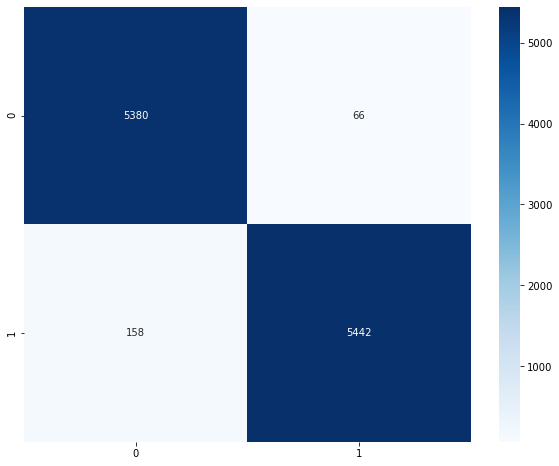

In [16]:
# predict
CvPredicts = CvSearch.predict(x_val)

# displaying confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_val, CvPredicts), annot=True, cmap='Blues', fmt='d')

# stats:
print(classification_report(y_val, CvPredicts))

This model gives a good result. <br>
>~98% accuracy, f1 score

### TfidfV, Naive Bayes

In [16]:
# creating pipeline
pipeTfidfV =  Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])
param_grid_tfidf = {
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)]
}

In [17]:
# using grid search cv
TfidfSearch = GridSearchCV(pipeTfidfV, param_grid_tfidf)
TfidfSearch.fit(x_train, y_train)

print(f"Best Training Score (tfidf): {TfidfSearch.best_score_*100} %")
print(f"Best Parameters (tfidf): {TfidfSearch.best_params_}")

Best Training Score (tfidf): 96.13933348899941 %
Best Parameters (tfidf): {'tfidf__ngram_range': (1, 3)}


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5325
           1       0.97      0.96      0.97      5900

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



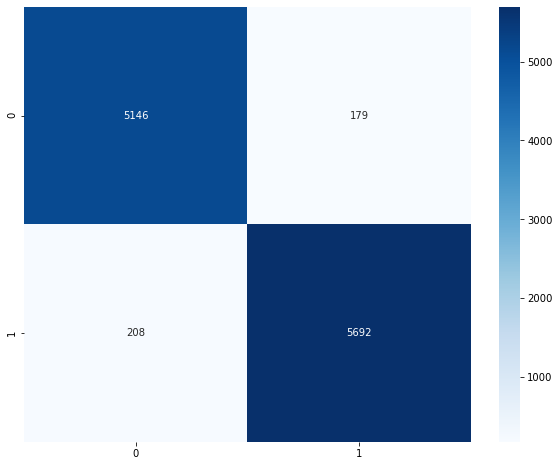

In [18]:
# predict
tfidfPredicts = TfidfSearch.predict(x_val)

# displaying confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_val, tfidfPredicts), annot=True, cmap='Blues', fmt='d')

# stats:
print(classification_report(y_val, tfidfPredicts))

Though the model is accurate, not as good as using CountVectorizer <br>
>~97% accuracy, f1 score

### CountV, LinearSVC

In [108]:
# creating pipeline
pipeCountV = Pipeline([('cv', CountVectorizer()), ('svm', LinearSVC(max_iter=10000, C=0.01))])
param_grid_cv = {
    'cv__ngram_range': [(1,1), (1,2), (1,3)]
}

In [109]:
# using grid search cv
CvSearch = GridSearchCV(pipeCountV, param_grid_cv)
CvSearch.fit(x_train, y_train)

print(f"Best Score (CV): {CvSearch.best_score_*100} %")
print(f"Best Parameters (CV): {CvSearch.best_params_}")

Best Score (CV): 99.57749788064572 %
Best Parameters (CV): {'cv__ngram_range': (1, 2)}


              precision    recall  f1-score   support

           0     0.9952    0.9963    0.9958      5446
           1     0.9964    0.9954    0.9959      5600

    accuracy                         0.9958     11046
   macro avg     0.9958    0.9958    0.9958     11046
weighted avg     0.9958    0.9958    0.9958     11046



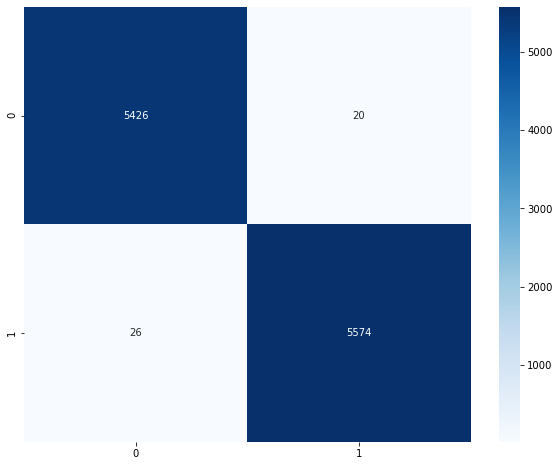

In [111]:
# predict
CvPredicts = CvSearch.predict(x_val)

# displaying confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_val, CvPredicts), annot=True, cmap='Blues', fmt='d')

# stats:
print(classification_report(y_val, CvPredicts, digits=4))

LinearSVC gives the best result. <br>
>99.58% accuracy <br>
>99.59% f1 score

### W2V, LSTM

In [15]:
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Activation, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

C:\Users\Rajamohan\anaconda3\envs\nlpenv2\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [19]:
# list of words
docs = [text.split() for text in x_train] 

# params
w2v_size = 200
w2v_window = 7
w2v_epoch = 32
w2v_min_count = 10

w2v_model = gensim.models.word2vec.Word2Vec(vector_size=w2v_size,window=w2v_window,min_count=w2v_min_count,workers=8)
w2v_model.build_vocab(docs)

vocab_len = len(w2v_model.wv)
print("Vocab size", vocab_len)

w2v_model.train(docs, total_examples=len(docs), epochs=w2v_epoch)

C:\Users\Rajamohan\anaconda3\envs\nlpenv2\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Vocab size 23667


(217709068, 234529824)

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1

In [21]:
# maxlen param
sequence_len = 100

# pad sequencing to ensure same length
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=sequence_len)
x_val = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen=sequence_len)

In [22]:
# creating the embedding matrix
embedding_matrix = np.zeros((vocab_size, w2v_size))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, w2v_size, weights=[embedding_matrix], input_length=sequence_len, trainable=False)

(171026, 200)


In [23]:
# using LSTM model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          34205200  
_________________________________________________________________
dropout (Dropout)            (None, 100, 200)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 34,325,701
Trainable params: 120,501
Non-trainable params: 34,205,200
_________________________________________________________________
None


In [24]:
# callbacks
lr = ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0)
es = EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)

callbacks = [lr,es]

In [25]:
epochs = 10
batch_size = 1024

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1,callbacks=callbacks)

Epoch 1/10
27/27 [==============================] - 99s 3s/step - loss: 0.5049 - accuracy: 0.7539 - val_loss: 0.2527 - val_accuracy: 0.9029
Epoch 2/10
27/27 [==============================] - 88s 3s/step - loss: 0.2519 - accuracy: 0.8973 - val_loss: 0.2399 - val_accuracy: 0.9351
Epoch 3/10
27/27 [==============================] - 105s 4s/step - loss: 0.1814 - accuracy: 0.9315 - val_loss: 0.3834 - val_accuracy: 0.8927
Epoch 4/10
27/27 [==============================] - 100s 4s/step - loss: 0.1362 - accuracy: 0.9505 - val_loss: 0.2944 - val_accuracy: 0.9131
Epoch 5/10
27/27 [==============================] - 96s 4s/step - loss: 0.1226 - accuracy: 0.9557 - val_loss: 0.3300 - val_accuracy: 0.9109
Epoch 6/10
27/27 [==============================] - 98s 4s/step - loss: 0.1105 - accuracy: 0.9602 - val_loss: 0.3087 - val_accuracy: 0.9210
Epoch 7/10
27/27 [==============================] - 108s 4s/step - loss: 0.0975 - accuracy: 0.9641 - val_loss: 0.2703 - val_accuracy: 0.9287


In [26]:
score = model.evaluate(x_val, y_val, batch_size=batch_size)
print()
print("acc:",score[1])
print("loss:",score[0])

11/11 [==============================] - 5s 477ms/step - loss: 0.2514 - accuracy: 0.9316

acc: 0.9315813183784485
loss: 0.25142723321914673


In [27]:
# decoding sentiment
def decode_sent(scores,threshold):
    score_lst = []
    for i in scores:
        if i[0] < threshold:
            score_lst.append(0)
        else:
            score_lst.append(1)
    return score_lst

113/113 [==============================] - 13s 73ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5325
           1       0.89      0.98      0.94      5900

    accuracy                           0.93     11225
   macro avg       0.94      0.93      0.93     11225
weighted avg       0.94      0.93      0.93     11225



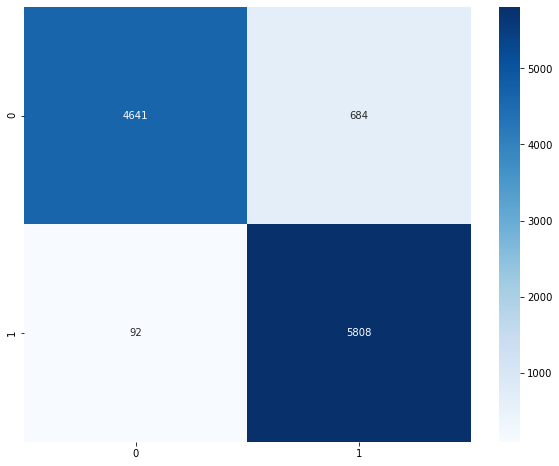

In [28]:
# using prediction of validation set
y_pred = model.predict(x_val, batch_size=100, verbose=1)
y_pred_lst = decode_sent(y_pred,0.2)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_val, y_pred_lst), annot=True, cmap='Blues', fmt='d')

# f1-score and other scores:
print(classification_report(y_val, y_pred_lst))


Not as good as the other models, but limited false negatives.

--------------------------------------------------
## Using text and numerical feature

Using the vectorized text and `all_caps` feature. <br>
This is to get some result out of the relation between number of all-caps words in the title and the authenticity of the news articles.

In [69]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [15]:
data

,title,text,subject,class,text_len,all_caps,join
0,secretary state trip asia,washington reuter secretary state rex tillerso...,politicsNews,0,1647,1,secretary state trip asia washington reuter se...
1,obama commit felony send million iran video,fox news senior judicial analyst judge andrew ...,Government News,1,138,5,obama commit felony send million iran video fo...
2,cranky socialist bernie sander temper tantrum ...,grouch bernie sander bad day maybe realize she...,politics,1,110,8,cranky socialist bernie sander temper tantrum ...
3,clinton lead trump percent white house race wa...,washington reuter democratic presidential nomi...,politicsNews,0,573,0,clinton lead trump percent white house race wa...
4,china highestprofile fugitive assail businessm...,beijing reuter china high profile fugitive exi...,worldnews,0,3801,0,china highestprofile fugitive assail businessm...
...,...,...,...,...,...,...,...
44893,watch elizabeth warren destroy donald trump ep...,senator elizabeth warren dma light republican ...,News,1,3275,2,watch elizabeth warren destroy donald trump ep...
44894,trump mock invent fake civil war battle golf c...,frederick douglass andrew jackson disappoint d...,News,1,4472,2,trump mock invent fake civil war battle golf c...
44895,internet live great firewall china,reuter great firewall china world extensive ef...,worldnews,0,2456,1,internet live great firewall china reuter grea...
44896,exclusive pursue direct diplomacy north korea ...,washington reuter united state quietly pursue ...,worldnews,0,5397,1,exclusive pursue direct diplomacy north korea ...


In [16]:
X_new = data[['join', 'all_caps']]
Y = data['class']
#X_new

In [17]:
X_new.isnull().sum()

join        0
all_caps    0
dtype: int64

### CountVectorizer

Using CountVectorizer on text and MinMaxScaler on the numerical feature. <br>
The function stacks these as a single sparse csr matrix.

In [18]:
def vect_stack(df, vectorizer):
    # using vectorizer on text
    x_train_vect = vect.fit_transform(df['join'])

    # min-max scaling all-caps feature
    x_train_num = np.array(df['all_caps'])
    x_train_num = np.reshape(x_train_num,(x_train_num.shape[0],1))
    scaler = MinMaxScaler()
    # converting scaled numeric feature to csr matrix
    x_train_num = csr_matrix(scaler.fit_transform(x_train_num))
    
    # stacking both csr matrices 
    x_train_stack = hstack([x_train_vect, x_train_num])
    print('output shape: ', x_train_stack.shape)
    
    # return the final concatenated csr matrix
    return x_train_stack

# using CountVector 
# parameters from previous cv
vect = CountVectorizer(ngram_range = (1,3)) 
X_stack = vect_stack(X_new, vect)

output shape:  (44182, 10037141)


### Train/test split

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X_stack,Y, test_size=0.25, random_state=42)
print(X_train.shape,X_val.shape)

(33136, 10037141) (11046, 10037141)


### Naive Bayes

In [62]:
nb = MultinomialNB(alpha=2)
nb.fit(X_train, Y_train)

MultinomialNB(alpha=2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5446
           1       0.99      0.97      0.98      5600

    accuracy                           0.98     11046
   macro avg       0.98      0.98      0.98     11046
weighted avg       0.98      0.98      0.98     11046



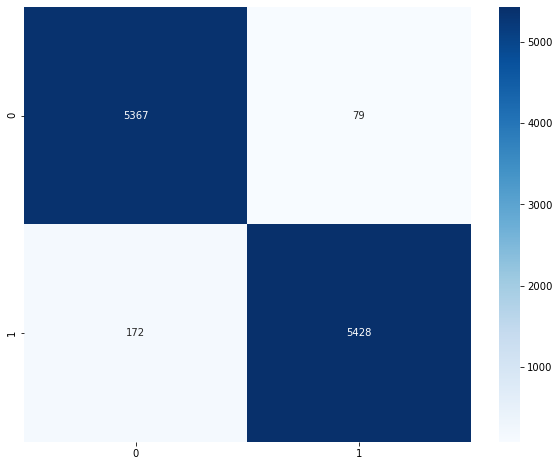

In [63]:
Y_predict = nb.predict(X_val)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_val, Y_predict), annot=True, cmap='Blues', fmt='d')

# f1-score and other scores:
print(classification_report(Y_val, Y_predict))

### LinearSVC

Testing parameters, cv takes too long

In [112]:
svm = LinearSVC(max_iter=10000, C=0.01, tol=0.00001)
svm.fit(X_train, Y_train)

LinearSVC(C=0.01, max_iter=10000, tol=1e-05)

              precision    recall  f1-score   support

           0     0.9954    0.9961    0.9958      5446
           1     0.9962    0.9955    0.9959      5600

    accuracy                         0.9958     11046
   macro avg     0.9958    0.9958    0.9958     11046
weighted avg     0.9958    0.9958    0.9958     11046



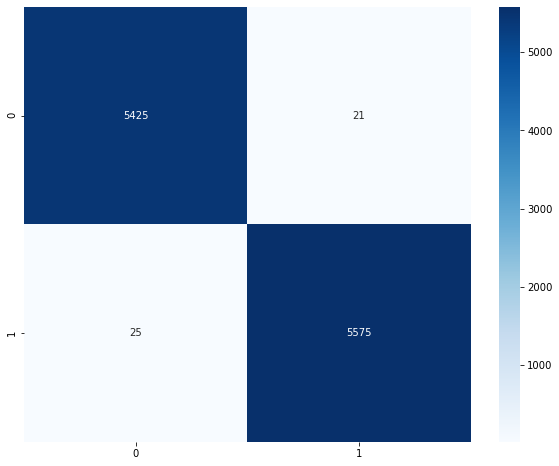

In [113]:
Y_predict = svm.predict(X_val)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_val, Y_predict), annot=True, cmap='Blues', fmt='d')

# f1-score and other scores:
print(classification_report(Y_val, Y_predict, digits=4))

LinearSVC is the best model tested in this notebook. <br>
>**99.59% f1 score** <br>
>**99.58% accuracy** <br>

Though adding the `all_caps` feature doesnt seem to make much difference to the results.